In [1]:
%matplotlib inline
%env KERAS_BACKEND=tensorflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import keras

from keras.datasets import mnist
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPool2D
from keras.layers import Add
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.optimizers import Adadelta
from keras.models import Sequential
from keras.utils import np_utils

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train / 255
x_test = x_test / 255

In [5]:
model = Sequential()
model.add(Conv2D(32,(4,4),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(4,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(4,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.compile(loss='mse', optimizer=Adadelta(lr=0.1), metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         131200    
__________

In [8]:
ok=model.fit(x_train, y_train, batch_size=100, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0896 - acc: 0.1018
Epoch 2/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0880 - acc: 0.1444
Epoch 3/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0784 - acc: 0.3493
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0325 - acc: 0.8028
Epoch 5/10
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0143 - acc: 0.9127
Epoch 6/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0104 - acc: 0.9358
Epoch 7/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0085 - acc: 0.9467
Epoch 8/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0074 - acc: 0.9544
Epoch 9/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.0066 - acc: 0.9591
Epoch 10/10
60000/60000 [==================

In [9]:
score = model.evaluate(x_train, y_train, batch_size=100)
print('we get "loss":', score[0])
print('we get "accuracy":', score[1])

60000/60000 [==============================] - 30s 498us/step
we get "loss": 0.005822096868456962
we get "accuracy": 0.9636833389600118


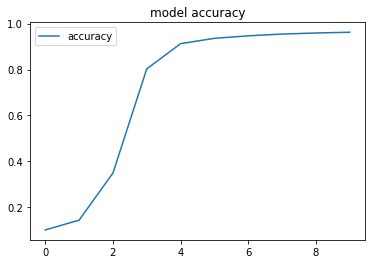

In [10]:
plt.plot(ok.history['acc'])
plt.title('model accuracy')
plt.legend(["accuracy"],loc = "best")
plt.show()